In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install scipy
# !pip install category_encoders
# !pip install xgboost
# !pip install lightgbm
# !pip install scikit-learn


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

from scipy import stats

from category_encoders import OneHotEncoder
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')
seed = 42
np.random.seed(seed)


from sklearn.metrics import balanced_accuracy_score, precision_score, classification_report
from sklearn.metrics import recall_score, f1_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold


In [2]:
csv_file_path = "C:\\Users\\tusha\\Downloads\\Fraud.csv"

original_data = pd.read_csv(csv_file_path, low_memory=False)
sampled_data = original_data.sample(1500000)

print("Data loaded and sampled successfully.")


Data loaded and sampled successfully.


In [3]:
print("Shape of Original Data:", original_data.shape)


Shape of Original Data: (6362620, 11)


In [4]:
print("Shape of Sampled Data:", sampled_data.shape)

Shape of Sampled Data: (1500000, 11)


In [5]:
original_data.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2652329,209,PAYMENT,2857.26,C1898310333,111497.00,108639.74,M1630091914,0.00,0.00,0,0
2970146,231,CASH_IN,57463.06,C386459484,5670789.78,5728252.84,C1946598781,148213.66,90750.60,0,0
1300251,136,PAYMENT,12128.03,C1530942396,0.00,0.00,M717332371,0.00,0.00,0,0
6322721,688,CASH_OUT,290610.12,C1908369360,0.00,0.00,C314934801,2850721.46,3141331.58,0,0
3700163,277,PAYMENT,27969.41,C1038665390,0.00,0.00,M1019193142,0.00,0.00,0,0
1489393,142,CASH_OUT,219378.98,C1721460260,20341.00,0.00,C911343205,8088.00,227466.98,0,0
6257490,599,PAYMENT,1769.66,C1230941640,10715.00,8945.34,M270300356,0.00,0.00,0,0
4898019,349,PAYMENT,5026.28,C1835378102,0.00,0.00,M135411679,0.00,0.00,0,0
674357,36,PAYMENT,14033.35,C836068619,0.00,0.00,M1075198524,0.00,0.00,0,0
2335547,188,CASH_IN,33002.12,C172796838,11506.00,44508.12,C147571590,0.00,0.00,0,0


In [6]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
original_data.isna().mean()

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

isFraud
0    6354407
1       8213
Name: count, dtype: int64


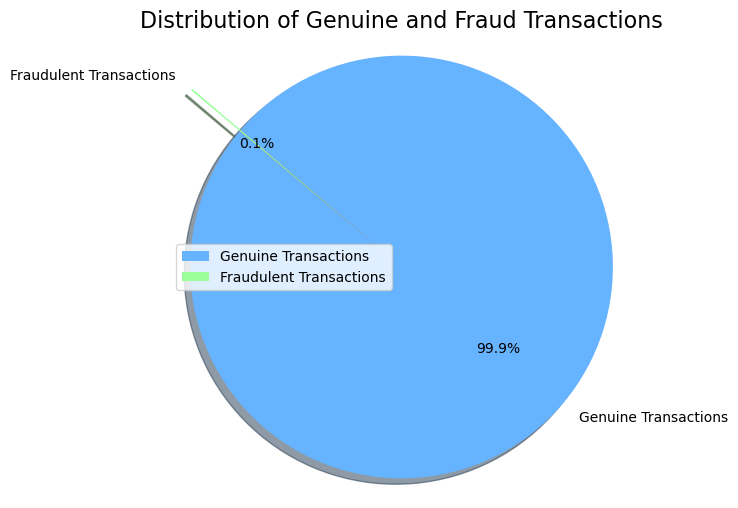

In [8]:
fraud_counts = original_data['isFraud'].value_counts()


print(fraud_counts)


labels = ['Genuine Transactions', 'Fraudulent Transactions']
colors = ['#66b3ff', '#99ff99']  
sizes = [fraud_counts[0], fraud_counts[1]]
explode = [0.1, 0.2]


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Genuine and Fraud Transactions', fontsize=16)
plt.axis('equal') 
plt.legend()
plt.show()


isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


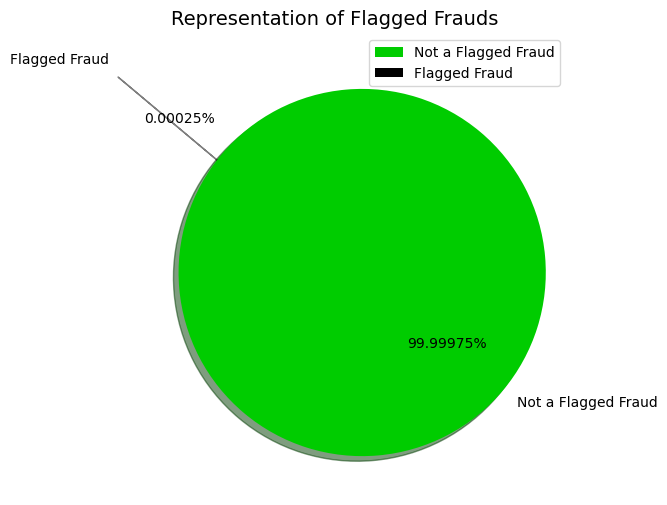

In [9]:

flagged_fraud_counts = original_data['isFlaggedFraud'].value_counts()


print(flagged_fraud_counts)


labels = ['Not a Flagged Fraud', 'Flagged Fraud']
colors = ['#00cc00', '#000000']  # Custom colors for a more appealing look
sizes = [flagged_fraud_counts[0], flagged_fraud_counts[1]]
explode = [0.4, 0.3]


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.5f%%', shadow=True, startangle=140)
plt.title('Representation of Flagged Frauds', fontsize=14)
plt.axis('equal') 
plt.legend()
plt.show()


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


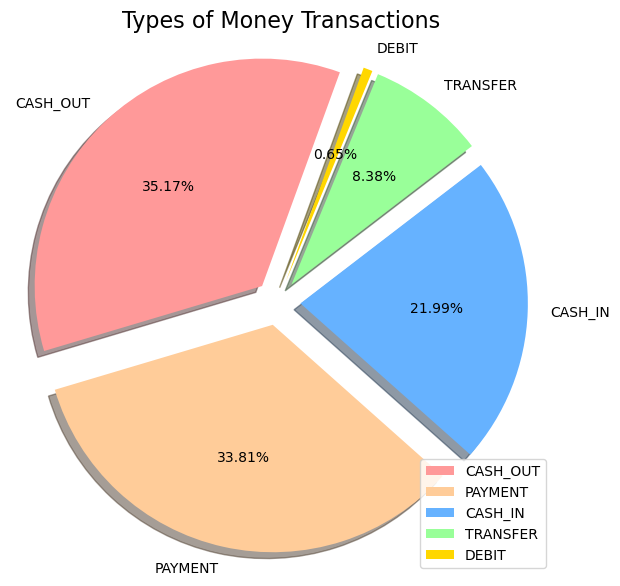

In [10]:

transaction_type_counts = original_data['type'].value_counts()

print(transaction_type_counts)


labels = transaction_type_counts.index
size = transaction_type_counts.values
colors = ['#FF9999', '#FFCC99', '#66B2FF', '#99FF99', '#FFD700']  
explode = [0.1, 0.1, 0.1, 0.1, 0.1] 


plt.figure(figsize=(7, 7))
plt.pie(size, colors=colors, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=70)
plt.title('Types of Money Transactions', fontsize=16)
plt.axis('equal') 
plt.legend()
plt.show()


In [11]:

unique_steps_count = original_data['step'].nunique()

print("The number of steps involved in transactions is:", unique_steps_count)


The number of steps involved in transactions is: 743


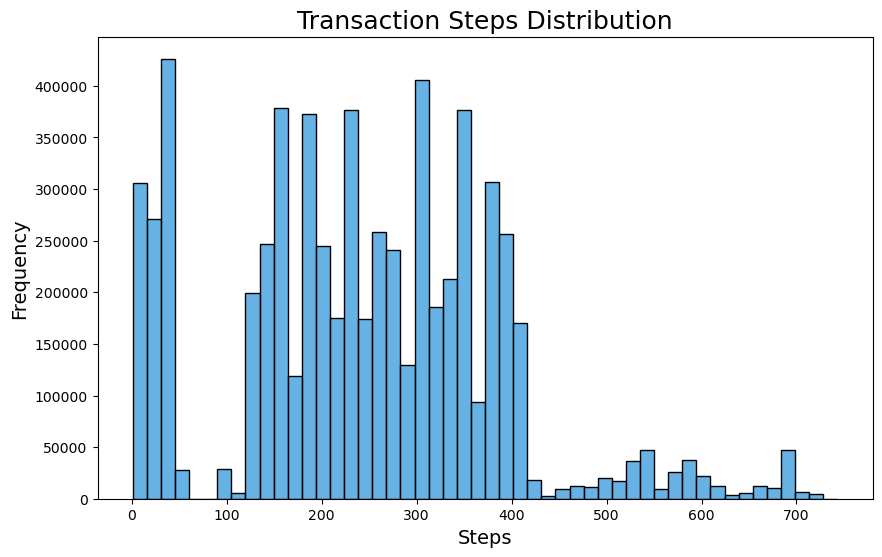

In [12]:

plt.rcParams['figure.figsize'] = (10, 6)


sns.histplot(original_data['step'], bins=50, color='#3498db', kde=False, edgecolor='black')


plt.title('Transaction Steps Distribution', fontsize=18)
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()


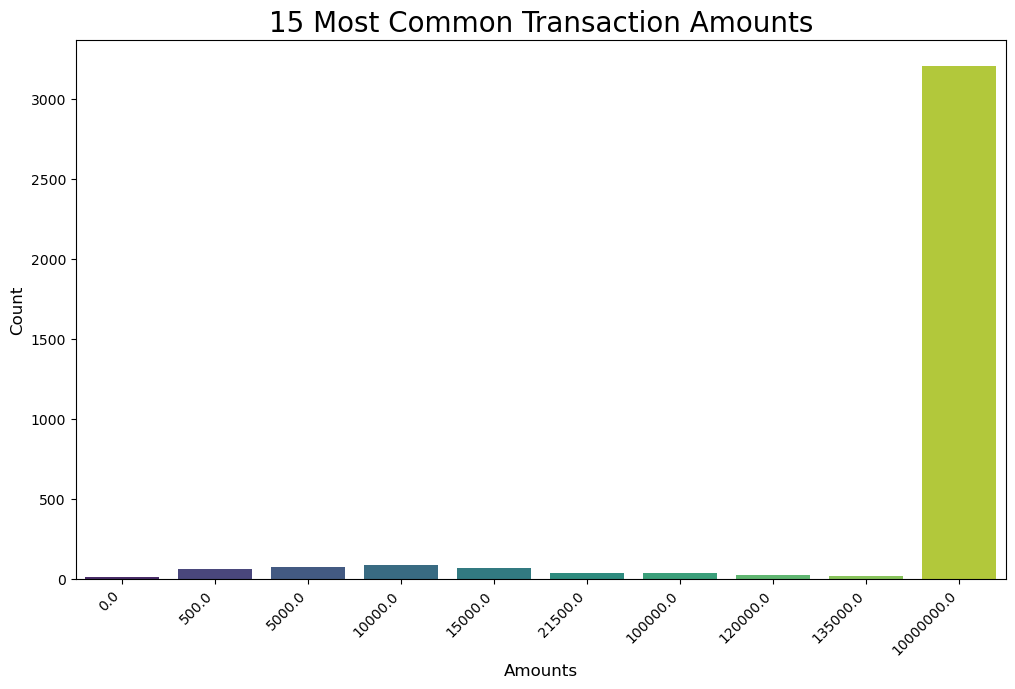

In [13]:


plt.rcParams['figure.figsize'] = (12, 7)


common_amounts = original_data['amount'].value_counts().head(10).sort_index()


sns.barplot(x=common_amounts.index, y=common_amounts.values, palette='viridis')

plt.title('15 Most Common Transaction Amounts', fontsize=20)
plt.xlabel('Amounts', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.xticks(rotation=45, ha='right')

plt.show()


In [14]:
original_data['isFraud'] = original_data['isFraud'].map({1: 'yes', 0: 'no'})
original_data['isFlaggedFraud'] = original_data['isFlaggedFraud'].map({1: 'yes', 0: 'no'})

sampled_data['isFraud'] = sampled_data['isFraud'].map({1: 'yes', 0: 'no'})
sampled_data['isFlaggedFraud'] = sampled_data['isFlaggedFraud'].map({1: 'yes', 0: 'no'})

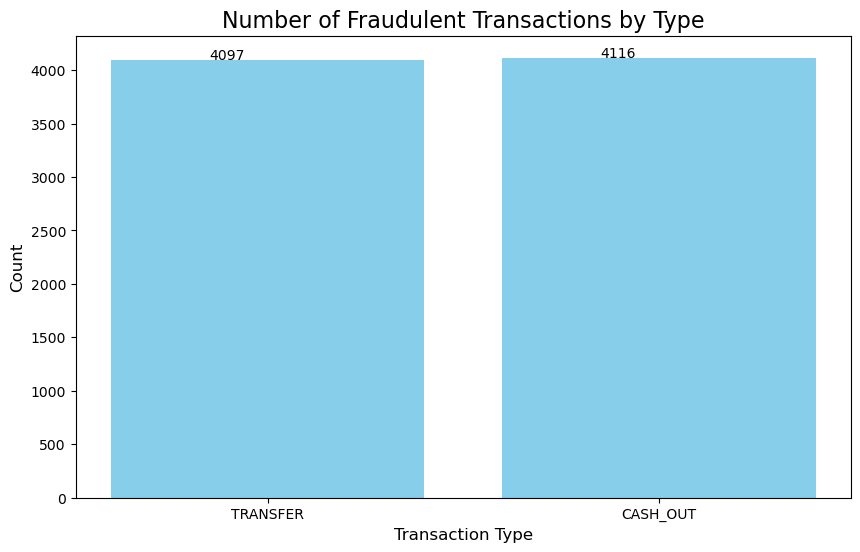

In [15]:

fraudulent_types = list(original_data.loc[original_data.isFraud == 'yes'].type.drop_duplicates().values)

fraud_counts = [len(original_data.loc[(original_data.isFraud == 'yes') & (original_data.type == fraud_type)]) for fraud_type in fraudulent_types]

plt.rcParams['figure.figsize'] = (10, 6)

bar_plot = plt.bar(fraudulent_types, fraud_counts, color='skyblue')
plt.title('Number of Fraudulent Transactions by Type', fontsize=16)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

for bar, count in zip(bar_plot, fraud_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(count), fontsize=10)

plt.ticklabel_format(style='plain', axis='y')

plt.show()


In [16]:



numeric_attributes = original_data.select_dtypes(exclude='object')
categorical_attributes = original_data.select_dtypes(include='object')
numeric_attributes1 = sampled_data.select_dtypes(exclude='object')
categorical_attributes1 = sampled_data.select_dtypes(include='object')


In [17]:

numeric_summary = numeric_attributes.describe().T


In [18]:

numeric_summary['range'] = (numeric_attributes.max() - numeric_attributes.min()).tolist()
numeric_summary['variation coefficient'] = (numeric_attributes.std() / numeric_attributes.mean()).tolist()
numeric_summary['skew'] = numeric_attributes.skew().tolist()

numeric_summary




,count,mean,std,min,25%,50%,75%,max,range,variation coefficient,skew
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02,7.420000e+02,0.584772,0.375177
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07,9.244552e+07,3.357344,30.993949
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07,5.958504e+07,3.463606,5.249136
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07,4.958504e+07,3.419485,5.176884
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08,3.560159e+08,3.088194,19.921758
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08,3.561793e+08,2.999298,19.352302


In [19]:
categorical_summary = categorical_attributes.describe()
categorical_summary


,type,nameOrig,nameDest,isFraud,isFlaggedFraud
count,6362620,6362620,6362620,6362620,6362620
unique,5,6353307,2722362,2,2
top,CASH_OUT,C1902386530,C1286084959,no,no
freq,2237500,3,113,6354407,6362604


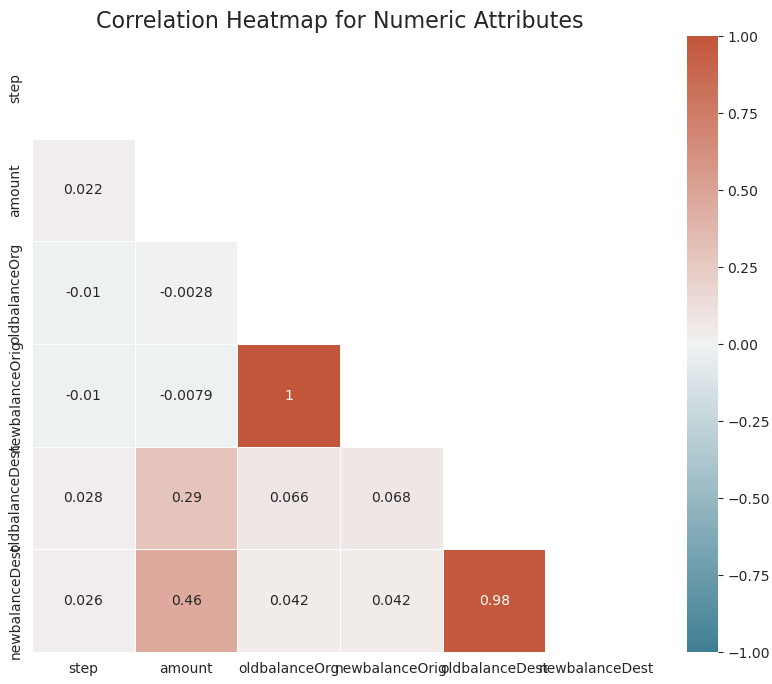

In [20]:



corr = numeric_attributes.corr()


cmap = sns.diverging_palette(220, 20, as_cmap=True)


mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


with sns.axes_style("white"):
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, linewidths=.5, square=True, vmin=-1, vmax=1)

plt.title('Correlation Heatmap for Numeric Attributes', fontsize=16)

plt.show()


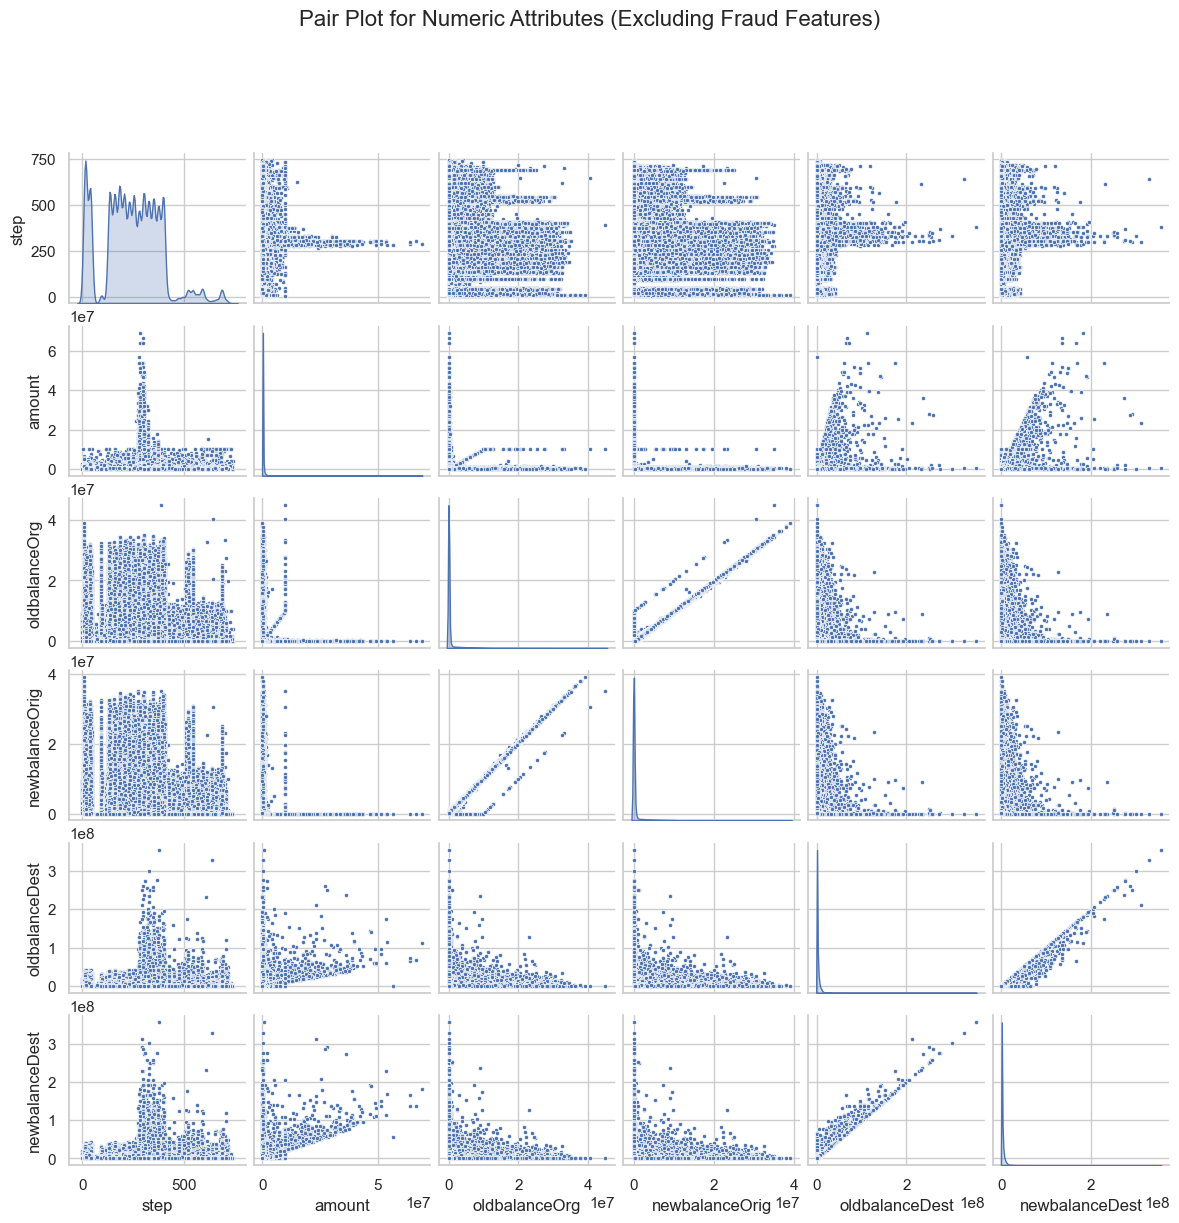

In [21]:

numeric_attributes1_no_fraud = numeric_attributes1

sns.set(style="whitegrid")

pair_plot = sns.pairplot(numeric_attributes1_no_fraud, diag_kind="kde", markers=".", height=2)


pair_plot.fig.suptitle("Pair Plot for Numeric Attributes (Excluding Fraud Features)", y=1.02, fontsize=16)
pair_plot.fig.subplots_adjust(top=0.9) 


plt.show()


In [22]:
original_data.isna().mean()

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

In [23]:




# def calc_cramers_v(x, y):
#     contingency_table = pd.crosstab(x, y).values
#     n = contingency_table.sum()
#     r, k = contingency_table.shape
    
#     chi2 = stats.chi2_contingency(contingency_table)[0]
#     chi2_corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    
#     k_corr = k - (k-1)**2/(n-1)
#     r_corr = r - (r-1)**2/(n-1)
    
#     denominator = min(k_corr-1, r_corr-1)
    

#     if denominator != 0:
#         return np.sqrt((chi2_corr/n) / denominator)
#     else:
#         return 0.0 


# dict_corr = {}
# columns = categorical_attributes1.columns.tolist()

# for column in columns:
#     dict_corr[column] = {}
    
#     for column2 in columns:
#         dict_corr[column][column2] = calc_cramers_v(categorical_attributes1[column], categorical_attributes1[column2])

# corr_matrix = pd.DataFrame(dict_corr)


# corr_matrix


In [24]:


# sns.set(style="whitegrid")


# mask = np.zeros_like(corr_matrix)
# mask[np.triu_indices_from(mask)] = True


# with sns.axes_style("white"):
#     plt.figure(figsize=(10, 8))
#     heatmap = sns.heatmap(corr_matrix, annot=True, mask=mask, vmin=0, vmax=1, square=True, cmap='coolwarm')

# heatmap.set_title("Correlation Heatmap for Categorical Attributes", fontsize=16)
# heatmap.set_xlabel("Categorical Attributes", fontsize=12)
# heatmap.set_ylabel("Categorical Attributes", fontsize=12)


# plt.show()


In [25]:
original_data.isna().mean()

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

In [26]:
#feature engineering
df_copy = sampled_data.copy()

df_copy['step_days'] = df_copy['step'] / 24
df_copy['step_weeks'] = df_copy['step'] / (24 * 7)


df_copy['diff_new_old_balance'] = df_copy['newbalanceOrig'] - df_copy['oldbalanceOrg']


df_copy['diff_new_old_destiny'] = df_copy['newbalanceDest'] - df_copy['oldbalanceDest']

df_copy['nameOrig'] = df_copy['nameOrig'].str[0]
df_copy['nameDest'] = df_copy['nameDest'].str[0]


In [27]:
df_copy1 = df_copy.copy()

In [28]:
X = df_copy1.drop(columns=['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest', 'step_weeks', 'step_days'])
y = df_copy1['isFraud'].map({'yes': 1, 'no': 0})

y.sample(15)

4261042    0
4305079    0
94216      0
6162624    0
1475380    0
2302566    0
3858258    0
1714395    0
5097115    0
852086     0
2723939    0
1888982    0
3823171    0
3918728    0
5153980    0
Name: isFraud, dtype: int64

In [29]:

original_data.isna().mean()

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

In [30]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=.30, stratify=y, random_state=213)

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=.30, stratify=y_temp, random_state=213)

In [32]:


encoding = OneHotEncoder(cols=['type'], use_cat_names=True)

X_train = encoding.fit_transform(X_train)
X_valid = encoding.transform(X_valid)

X_temp = encoding.fit_transform(X_temp)
X_test = encoding.transform(X_test)

In [33]:
num_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
               'diff_new_old_balance', 'diff_new_old_destiny']
scaling = MinMaxScaler()


X_params = X_temp.copy()

X_train[num_columns] = scaling.fit_transform(X_train[num_columns])
X_valid[num_columns] = scaling.transform(X_valid[num_columns])

X_params[num_columns] = scaling.fit_transform(X_temp[num_columns])
X_test[num_columns] = scaling.transform(X_test[num_columns])

In [34]:
final_columns_selected = ['step', 'oldbalanceOrg', 
                          'newbalanceOrig', 'newbalanceDest', 
                          'diff_new_old_balance', 'diff_new_old_destiny', 
                          'type_TRANSFER']

In [35]:
X_train_selected = X_train[final_columns_selected]
X_valid_selected = X_valid[final_columns_selected]

X_temp_selected = X_temp[final_columns_selected]
X_test_selected = X_test[final_columns_selected]

X_params_selected = X_params[final_columns_selected]




In [36]:

def ml_scores_with_time_and_save(model, X_train, y_train, X_valid, y_valid, records_file_path):
    start_time_fit = time.time()
    model.fit(X_train, y_train)
    end_time_fit = time.time()
    elapsed_time_fit = end_time_fit - start_time_fit
    
    start_time_predict = time.time()
    y_pred = model.predict(X_valid)
    end_time_predict = time.time()
    elapsed_time_predict = end_time_predict - start_time_predict
    
    accuracy = balanced_accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    
    result_df = pd.DataFrame({
        'Balanced Accuracy': np.round(accuracy, 3),
        'Precision': np.round(precision, 3),
        'Recall': np.round(recall, 3),
        'F1': np.round(f1, 3),
        'Time Taken (Fit) (s)': np.round(elapsed_time_fit, 3),
        'Time Taken (Predict) (s)': np.round(elapsed_time_predict, 3)
        }, index=[type(model).__name__])
    
    
   
    records_df=X_valid.copy()
    records_df['predicted']=y_pred.copy()
    records_df['actual']=y_valid.copy()
    records_df.to_csv(records_file_path, index=False)
    
    return result_df

In [37]:
dummy = DummyClassifier()
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
svm_model = SVC()
lightgbm_model = LGBMClassifier()
xgboost_model = XGBClassifier(n_estimators=100,random_state=40)
random_forest = RandomForestClassifier()

In [38]:
save_path_dummy = 'result_dummy.csv'
result_dummy = ml_scores_with_time_and_save(dummy, X_train_selected, y_train, X_valid_selected, y_valid, save_path_dummy)
result_dummy



,Balanced Accuracy,Precision,Recall,F1,Time Taken (Fit) (s),Time Taken (Predict) (s)
DummyClassifier,0.5,0.0,0.0,0.0,0.022,0.001


In [39]:
save_path_logistic_regression = 'result_logistic_regression.csv'
result_logistic_regression = ml_scores_with_time_and_save(logistic_regression, X_train_selected, y_train, X_valid_selected, y_valid, save_path_logistic_regression)
result_logistic_regression

,Balanced Accuracy,Precision,Recall,F1,Time Taken (Fit) (s),Time Taken (Predict) (s)
LogisticRegression,0.584,1.0,0.168,0.288,3.302,0.011


In [40]:

save_path_knn = 'result_knn.csv'
result_knn = ml_scores_with_time_and_save(knn, X_train_selected, y_train, X_valid_selected, y_valid, save_path_knn)
result_knn

,Balanced Accuracy,Precision,Recall,F1,Time Taken (Fit) (s),Time Taken (Predict) (s)
KNeighborsClassifier,0.635,0.982,0.269,0.422,2.165,41.047


In [41]:
save_path_svm = 'result_svm.csv'
result_svm = ml_scores_with_time_and_save(svm_model, X_train_selected, y_train, X_valid_selected, y_valid, save_path_svm)
result_svm

,Balanced Accuracy,Precision,Recall,F1,Time Taken (Fit) (s),Time Taken (Predict) (s)
SVC,0.5,0.0,0.0,0.0,469.311,44.032


In [42]:
save_path_random_forest = 'result_random_forest.csv'
result_random_forest = ml_scores_with_time_and_save(random_forest, X_train_selected, y_train, X_valid_selected, y_valid, save_path_random_forest)
result_random_forest

,Balanced Accuracy,Precision,Recall,F1,Time Taken (Fit) (s),Time Taken (Predict) (s)
RandomForestClassifier,0.888,0.963,0.775,0.859,121.47,2.458


In [43]:
save_path_xgboost = 'result_xgboost.csv'
result_xgboost = ml_scores_with_time_and_save(xgboost_model, X_train_selected, y_train, X_valid_selected, y_valid, save_path_xgboost)
result_xgboost

,Balanced Accuracy,Precision,Recall,F1,Time Taken (Fit) (s),Time Taken (Predict) (s)
XGBClassifier,0.896,0.941,0.793,0.861,2.066,0.111


In [44]:
save_path_lightgbm = 'result_lightgbm.csv'
result_lightgbm = ml_scores_with_time_and_save(lightgbm_model, X_train_selected, y_train, X_valid_selected, y_valid, save_path_lightgbm)
result_lightgbm

[LightGBM] [Info] Number of positive: 946, number of negative: 734054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1532
[LightGBM] [Info] Number of data points in the train set: 735000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001287 -> initscore=-6.654095
[LightGBM] [Info] Start training from score -6.654095


,Balanced Accuracy,Precision,Recall,F1,Time Taken (Fit) (s),Time Taken (Predict) (s)
LGBMClassifier,0.64,0.238,0.281,0.258,1.527,0.178


In [45]:
modeling_performance = pd.concat([result_dummy, result_logistic_regression, result_knn, 
                                  result_random_forest, result_xgboost, result_lightgbm,
                                  result_svm])
modeling_performance_sorted = modeling_performance.sort_values(by="Balanced Accuracy", ascending=True)
modeling_performance_sorted

,Balanced Accuracy,Precision,Recall,F1,Time Taken (Fit) (s),Time Taken (Predict) (s)
DummyClassifier,0.500,0.000,0.000,0.000,0.022,0.001
SVC,0.500,0.000,0.000,0.000,469.311,44.032
LogisticRegression,0.584,1.000,0.168,0.288,3.302,0.011
KNeighborsClassifier,0.635,0.982,0.269,0.422,2.165,41.047
LGBMClassifier,0.640,0.238,0.281,0.258,1.527,0.178
RandomForestClassifier,0.888,0.963,0.775,0.859,121.470,2.458
XGBClassifier,0.896,0.941,0.793,0.861,2.066,0.111


In [46]:
# def ml_cv_results(model_name, model, x, y, verbose=1):
    
#     '''initial'''
#     balanced_accuracies = []
#     precisions = []
#     recalls = []
#     f1s = []
#     kappas = []
    
#     mm = MinMaxScaler()
    
#     x_ = x.to_numpy()
#     y_ = y.to_numpy()
    
#     count = 0
    
#     '''cross-validation'''
#     skf = StratifiedKFold(n_splits=5, shuffle=True)
    
#     for index_train, index_test in skf.split(x_, y_):
#         ## Showing the Fold
#         if verbose > 0:
#             count += 1
#             print('Fold K=%i' % (count))
    
#         ## selecting train and test
#         x_train, x_test = x.iloc[index_train], x.iloc[index_test]
#         y_train, y_test = y.iloc[index_train], y.iloc[index_test]
        
#         ## applying the scale
#         x_train = mm.fit_transform(x_train)
#         x_test = mm.transform(x_test)
    
#         ## training the model
#         model.fit(x_train, y_train)
#         y_pred = model.predict(x_test)

#         ## saving the metrics
#         balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
#         precisions.append(precision_score(y_test, y_pred))
#         recalls.append(recall_score(y_test, y_pred))
#         f1s.append(f1_score(y_test, y_pred))

        
        
#     '''results'''    
#     accuracy_mean, accuracy_std = np.round(np.mean(balanced_accuracies), 3), np.round(np.std(balanced_accuracies), 3)
#     precision_mean, precision_std = np.round(np.mean(precisions), 3), np.round(np.std(precisions), 3)
#     recall_mean, recall_std = np.round(np.mean(recalls), 3), np.round(np.std(recalls), 3)
#     f1_mean, f1_std = np.round(np.mean(f1s), 3), np.round(np.std(f1s), 3)
#     kappa_mean, kappa_std = np.round(np.mean(kappas), 3), np.round(np.std(kappas), 3)
    
#     ## saving the results in a dataframe
#     return pd.DataFrame({"Balanced Accuracy": "{} +/- {}".format(accuracy_mean, accuracy_std),
#                         "Precision": "{} +/- {}".format(precision_mean, precision_std),
#                         "Recall": "{} +/- {}".format(recall_mean, recall_std),
#                         "F1": "{} +/- {}".format(f1_mean, f1_std)},
#                        index=[model_name])

In [47]:
def ml_cv_results(model_name, model, x, y, verbose=1):
    
    '''initial'''
    balanced_accuracies = []
    precisions = []
    recalls = []
    f1s = []
    
    mm = MinMaxScaler()
    
    x_ = x.to_numpy()
    y_ = y.to_numpy()
    
    count = 0
    
    '''cross-validation'''
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    
    start_time_cv = time.time()
    
    for index_train, index_test in skf.split(x_, y_):
        ## Showing the Fold
        if verbose > 0:
            count += 1
            print('Fold K=%i' % (count))
    
        x_train, x_test = x.iloc[index_train], x.iloc[index_test]
        y_train, y_test = y.iloc[index_train], y.iloc[index_test]
        
        x_train = mm.fit_transform(x_train)
        x_test = mm.transform(x_test)
    
        start_time_fit = time.time()
        model.fit(x_train, y_train)
        end_time_fit = time.time()
        elapsed_time_fit = end_time_fit - start_time_fit
        
        y_pred = model.predict(x_test)

        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        
    end_time_cv = time.time()
    elapsed_time_cv = end_time_cv - start_time_cv
    
    '''results'''    
    accuracy_mean, accuracy_std = np.round(np.mean(balanced_accuracies), 3), np.round(np.std(balanced_accuracies), 3)
    precision_mean, precision_std = np.round(np.mean(precisions), 3), np.round(np.std(precisions), 3)
    recall_mean, recall_std = np.round(np.mean(recalls), 3), np.round(np.std(recalls), 3)
    f1_mean, f1_std = np.round(np.mean(f1s), 3), np.round(np.std(f1s), 3)
    
    result_df = pd.DataFrame({
        "Balanced Accuracy": "{} +/- {}".format(accuracy_mean, accuracy_std),
        "Precision": "{} +/- {}".format(precision_mean, precision_std),
        "Recall": "{} +/- {}".format(recall_mean, recall_std),
        "F1": "{} +/- {}".format(f1_mean, f1_std),
        "Time Taken (CV) (s)": np.round(elapsed_time_cv, 3)
    }, index=[model_name]) 
    
    return result_df


In [50]:
# print(classification_report(y_valid, y_pred_dummy))

In [51]:
# print(classification_report(y_valid, y_pred_lg))

In [52]:
# print(classification_report(y_valid, y_pred_knn))

In [53]:
# print(classification_report(y_valid, y_pred_svm))

In [54]:
# print(classification_report(y_valid, y_pred_rf))

In [55]:
# print(classification_report(y_valid, y_pred_xgb))

In [56]:
# print(classification_report(y_valid,  y_pred_lightgbm))

In [48]:
dummy_cv = ml_cv_results('Dummy', DummyClassifier(),  X_temp_selected, y_temp)
dummy_cv

Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Time Taken (CV) (s)
Dummy,0.5 +/- 0.0,0.0 +/- 0.0,0.0 +/- 0.0,0.0 +/- 0.0,1.734


In [49]:
svm_cv = ml_cv_results('SVM', SVC(),  X_temp_selected, y_temp)
svm_cv

In [50]:
lg_cv = ml_cv_results('Logistic Regression',LogisticRegression(), X_temp_selected, y_temp)
lg_cv

Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Time Taken (CV) (s)
Logistic Regression,0.591 +/- 0.016,0.988 +/- 0.016,0.183 +/- 0.031,0.307 +/- 0.044,10.39


In [51]:
knn_cv = ml_cv_results('K Nearest Neighbors', KNeighborsClassifier(),  X_temp_selected, y_temp)
knn_cv

Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Time Taken (CV) (s)
K Nearest Neighbors,0.739 +/- 0.007,0.936 +/- 0.011,0.477 +/- 0.015,0.632 +/- 0.013,167.43


In [52]:
rf_cv = ml_cv_results('Random Forest', RandomForestClassifier(), X_temp_selected, y_temp)
rf_cv

Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Time Taken (CV) (s)
Random Forest,0.88 +/- 0.011,0.971 +/- 0.011,0.76 +/- 0.023,0.852 +/- 0.014,680.47


In [53]:
lightgbm_cv = ml_cv_results('LightGBM', LGBMClassifier(), X_temp_selected, y_temp)
lightgbm_cv

Fold K=1
[LightGBM] [Info] Number of positive: 1081, number of negative: 838919
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1532
[LightGBM] [Info] Number of data points in the train set: 840000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001287 -> initscore=-6.654228
[LightGBM] [Info] Start training from score -6.654228
Fold K=2
[LightGBM] [Info] Number of positive: 1081, number of negative: 838919
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1532
[LightGBM] [Info] Number of data points in the train set: 840000, number of used features: 7


,Balanced Accuracy,Precision,Recall,F1,Time Taken (CV) (s)
LightGBM,0.639 +/- 0.114,0.208 +/- 0.139,0.28 +/- 0.227,0.231 +/- 0.171,9.122


In [54]:
xgb_cv = ml_cv_results('XGBoost', XGBClassifier(),X_temp_selected, y_temp)
xgb_cv

Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Time Taken (CV) (s)
XGBoost,0.892 +/- 0.009,0.944 +/- 0.01,0.783 +/- 0.019,0.856 +/- 0.009,11.295


In [55]:
modeling_performance_cv = pd.concat([dummy_cv, lg_cv, knn_cv, rf_cv, 
                                     xgb_cv, lightgbm_cv])

modeling_performance_cv.sort_values(by="Balanced Accuracy", ascending=True)

,Balanced Accuracy,Precision,Recall,F1,Time Taken (CV) (s)
Dummy,0.5 +/- 0.0,0.0 +/- 0.0,0.0 +/- 0.0,0.0 +/- 0.0,1.734
Logistic Regression,0.591 +/- 0.016,0.988 +/- 0.016,0.183 +/- 0.031,0.307 +/- 0.044,10.390
LightGBM,0.639 +/- 0.114,0.208 +/- 0.139,0.28 +/- 0.227,0.231 +/- 0.171,9.122
K Nearest Neighbors,0.739 +/- 0.007,0.936 +/- 0.011,0.477 +/- 0.015,0.632 +/- 0.013,167.430
Random Forest,0.88 +/- 0.011,0.971 +/- 0.011,0.76 +/- 0.023,0.852 +/- 0.014,680.470
XGBoost,0.892 +/- 0.009,0.944 +/- 0.01,0.783 +/- 0.019,0.856 +/- 0.009,11.295


In [56]:
# def plot_confusion_matrix_stratified(model, x, y, n_splits=5):
#     skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#     fig, ax = plt.subplots(figsize=(8, 6))
#     sns.set(font_scale=1.2)

#     average_cm = np.zeros((2, 2), dtype=int)

#     for _, test_index in skf.split(x, y):
#         x_test, y_test = x.iloc[test_index], y.iloc[test_index]
#         y_pred = model.predict(x_test)
#         cm = confusion_matrix(y_test, y_pred)
#         average_cm += cm

#     average_cm = np.round(average_cm / n_splits).astype(int)


#     sns.heatmap(average_cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False, ax=ax)

#     plt.title('Average Confusion Matrix (Stratified K-Fold)')
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('True Labels')
#     plt.show()

In [57]:


def plot_confusion_matrix_roc_pr_curves(model, x, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    sns.set(font_scale=1.2)

    average_cm = np.zeros((2, 2), dtype=int)
    all_true_labels = []
    all_probabilities = []

    for _, test_index in skf.split(x, y):
        x_test, y_test = x.iloc[test_index], y.iloc[test_index]
        y_pred_proba = model.predict_proba(x_test)[:, 1]
        y_pred = (y_pred_proba > 0.5).astype(int)
        cm = confusion_matrix(y_test, y_pred)
        average_cm += cm
        all_true_labels.extend(y_test)
        all_probabilities.extend(y_pred_proba)

    average_cm = np.round(average_cm / n_splits).astype(int)

    sns.heatmap(average_cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False, ax=ax1)
    ax1.set_title('Average Confusion Matrix (Stratified K-Fold)')
    ax1.set_xlabel('Predicted Labels')
    ax1.set_ylabel('True Labels')

    fpr, tpr, _ = roc_curve(all_true_labels, all_probabilities)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve')

    precision, recall, _ = precision_recall_curve(all_true_labels, all_probabilities)
    ax3.step(recall, precision, color='b', alpha=0.2, where='post')
    ax3.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    ax3.set_xlim([0.0, 1.0])
    ax3.set_ylim([0.0, 1.05])
    ax3.set_xlabel('Recall')
    ax3.set_ylabel('Precision')
    ax3.set_title('Precision-Recall Curve')

    plt.tight_layout()
    plt.show()



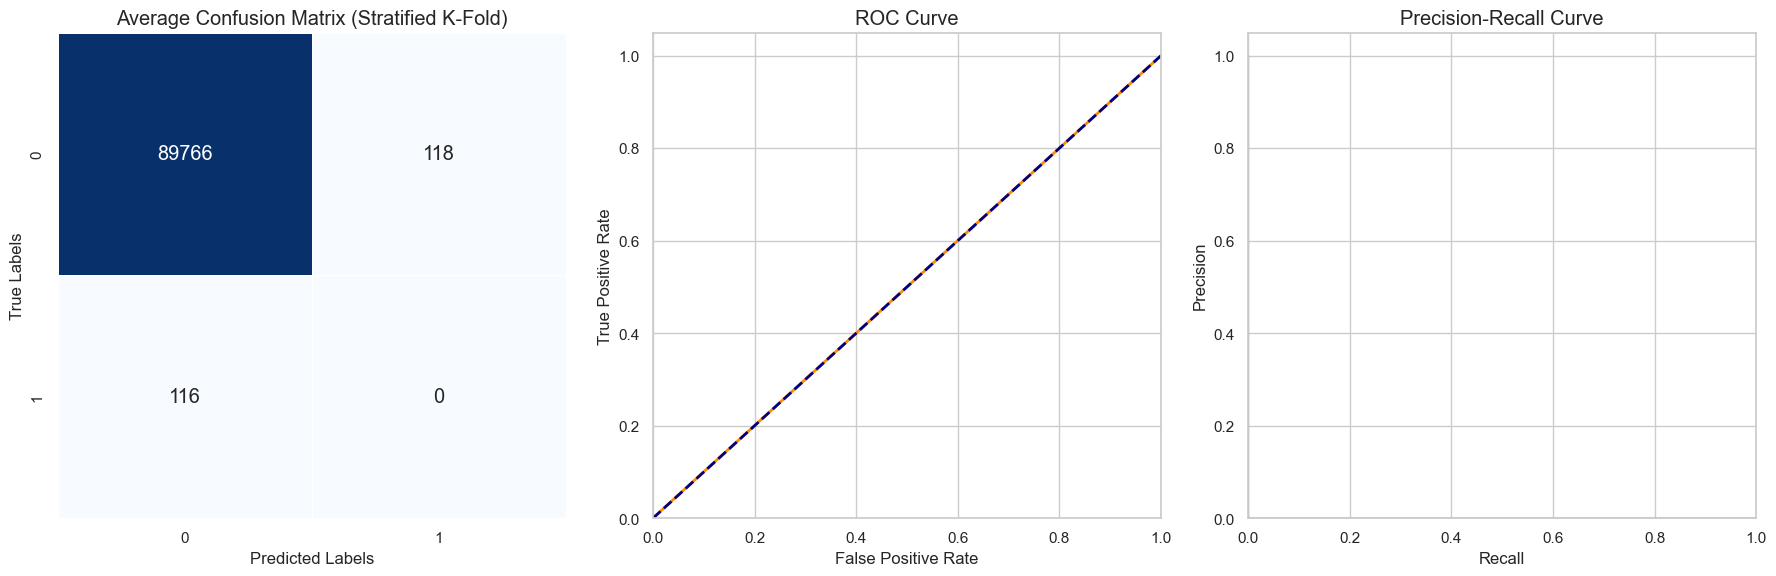

In [58]:
dummy_model = DummyClassifier(strategy="stratified").fit(X_train_selected, y_train)
plot_confusion_matrix_roc_pr_curves(dummy_model, X_test, y_test)

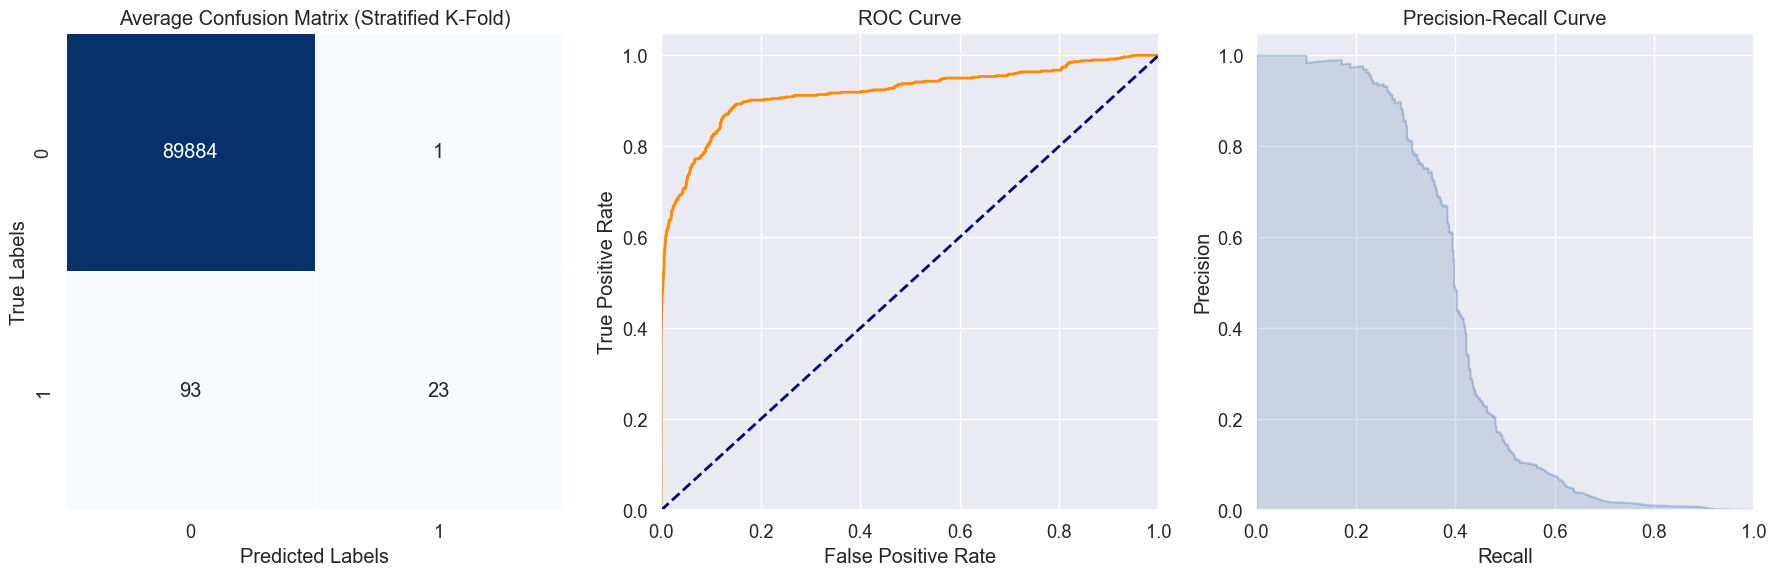

In [59]:
logreg_model = LogisticRegression().fit(X_train_selected, y_train)
plot_confusion_matrix_roc_pr_curves(logreg_model,X_test_selected, y_test)

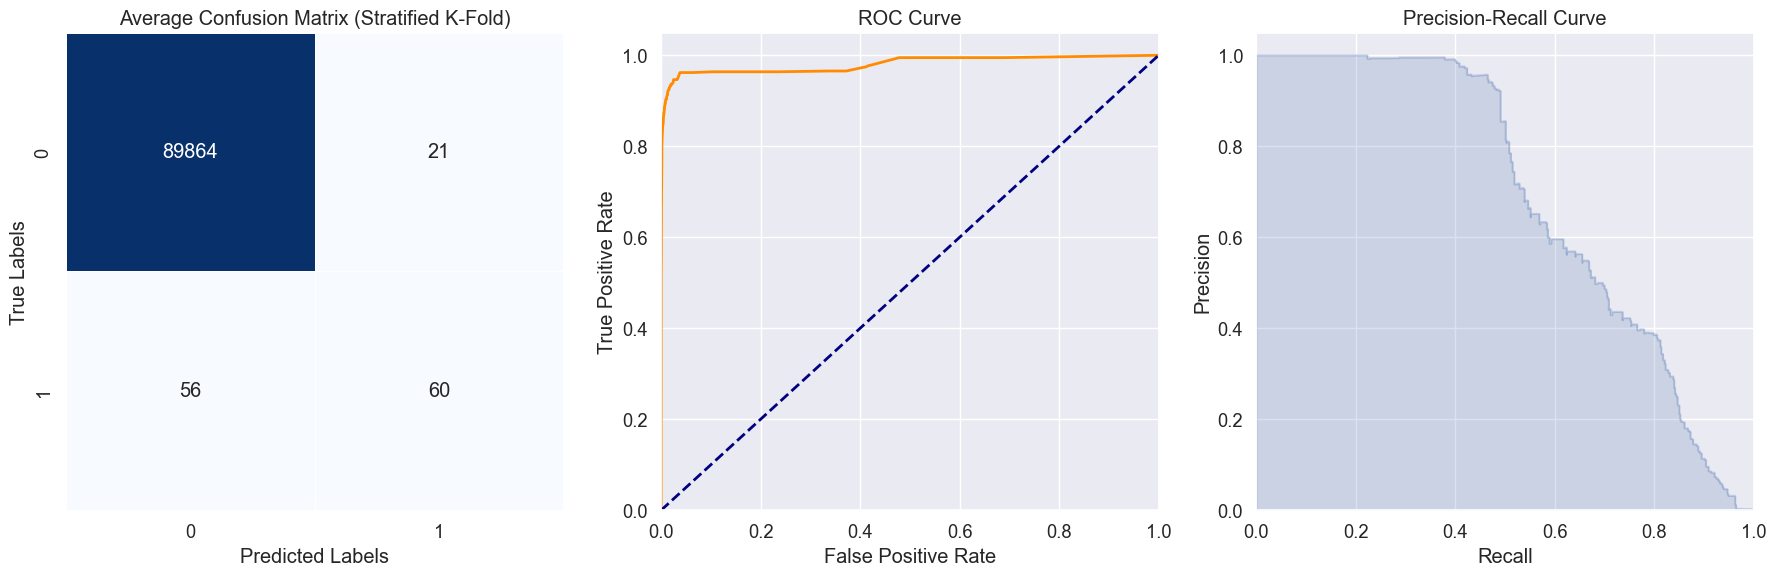

In [60]:
rf_model = RandomForestClassifier().fit(X_train_selected, y_train)
plot_confusion_matrix_roc_pr_curves(rf_model, X_test_selected, y_test)

In [61]:
#svm_model = SVC().fit(X_train_selected, y_train)
#plot_confusion_matrix_roc_pr_curves(svm_model, X_test_selected, y_test)

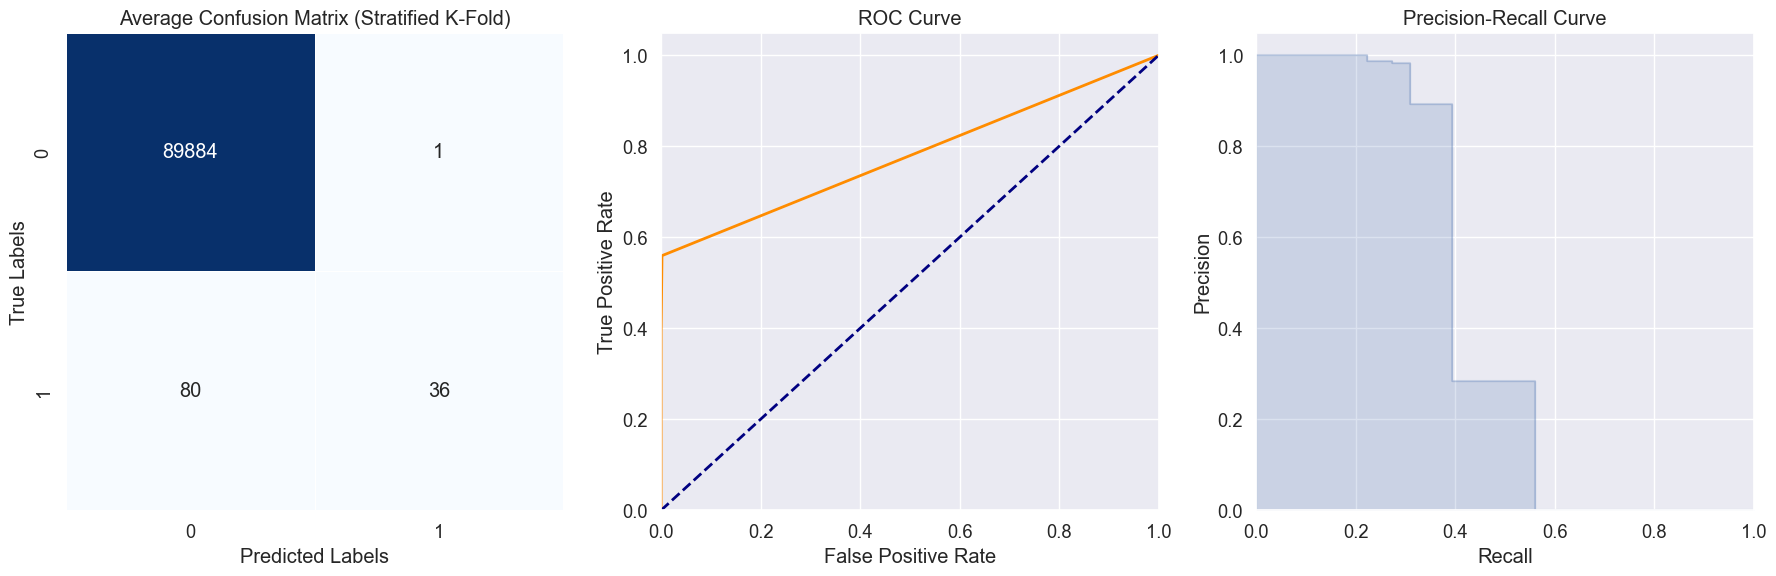

In [62]:
knn_model = KNeighborsClassifier().fit(X_train_selected, y_train)
plot_confusion_matrix_roc_pr_curves(knn_model, X_test_selected, y_test)

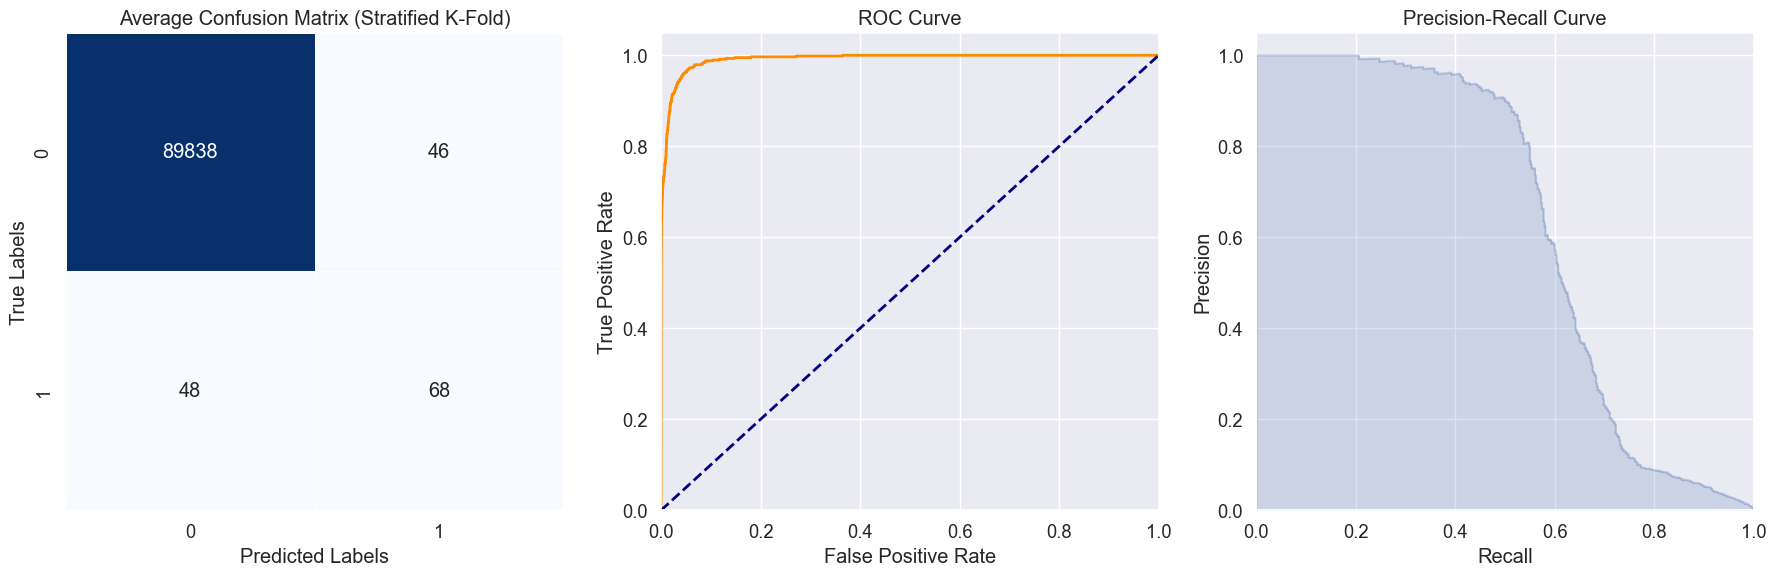

In [63]:
xgb_model = XGBClassifier().fit(X_train_selected, y_train)
plot_confusion_matrix_roc_pr_curves(xgb_model, X_test_selected, y_test)

[LightGBM] [Info] Number of positive: 946, number of negative: 734054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1532
[LightGBM] [Info] Number of data points in the train set: 735000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001287 -> initscore=-6.654095
[LightGBM] [Info] Start training from score -6.654095


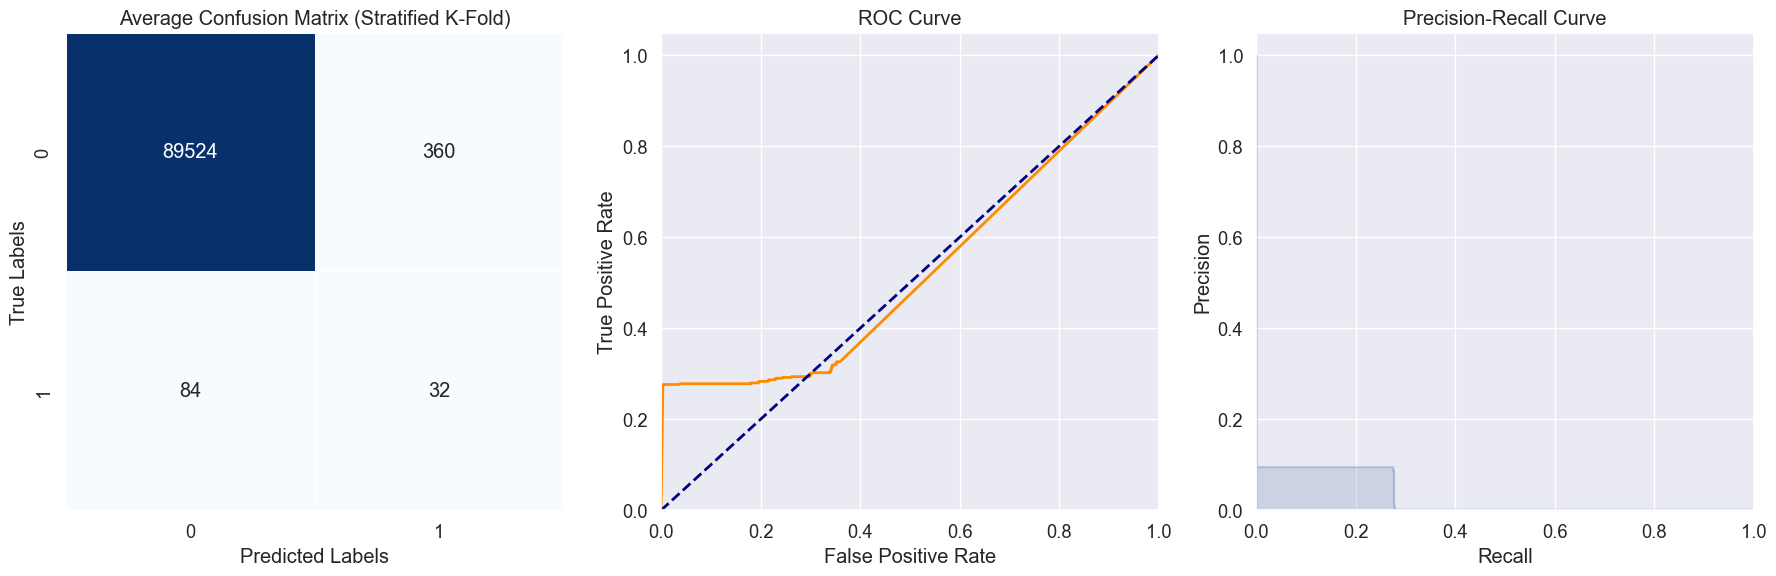

In [64]:
lgbm_model = LGBMClassifier().fit(X_train_selected, y_train)
plot_confusion_matrix_roc_pr_curves(lgbm_model, X_test_selected, y_test)

In [65]:

model = XGBClassifier()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

cm = confusion_matrix(y_test, y_pred)

false_negatives_indices = np.where((y_test == 1) & (y_pred == 0))[0]

false_negatives_instances_XGB = X_test_selected.iloc[false_negatives_indices]



if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
    print("\nFeature Importances:")
    for feature, importance in zip(X_test_selected.columns, feature_importances):
        print(f"{feature}: {importance}")



Feature Importances:
step: 0.02951349876821041
oldbalanceOrg: 0.08113448321819305
newbalanceOrig: 0.24105404317378998
newbalanceDest: 0.1341305524110794
diff_new_old_balance: 0.26923173666000366
diff_new_old_destiny: 0.06229861080646515
type_TRANSFER: 0.182637020945549


In [66]:
print("Instances where XGBoost failed to predict true labels (False Negatives):")
false_negatives_instances_XGB

Instances where XGBoost failed to predict true labels (False Negatives):


,step,oldbalanceOrg,newbalanceOrig,newbalanceDest,diff_new_old_balance,diff_new_old_destiny,type_TRANSFER
562243,22,0.001997,0.0,0.005424,0.839353,0.059058,0
5996228,423,0.005322,0.0,0.000000,0.828401,0.058328,1
6336979,691,0.002995,0.0,0.000000,0.836065,0.058328,1
6342579,692,0.001183,0.0,0.002415,0.842035,0.058760,0
6168683,558,0.008138,0.0,0.000000,0.819126,0.058328,1
...,...,...,...,...,...,...,...
1059584,106,0.001830,0.0,0.000000,0.839903,0.058328,1
4403699,321,0.005236,0.0,0.000000,0.828686,0.058328,1
3578417,261,0.004195,0.0,0.000000,0.832114,0.058328,1
6281465,645,0.000565,0.0,0.000062,0.844072,0.058534,0


In [67]:
model = LGBMClassifier()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

cm = confusion_matrix(y_test, y_pred)

false_negatives_indices = np.where((y_test == 1) & (y_pred == 0))[0]

false_negatives_instances_LGBM = X_test_selected.iloc[false_negatives_indices]

if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
    print("\nFeature Importances:")
    for feature, importance in zip(X_test_selected.columns, feature_importances):
        print(f"{feature}: {importance}")


[LightGBM] [Info] Number of positive: 946, number of negative: 734054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1532
[LightGBM] [Info] Number of data points in the train set: 735000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001287 -> initscore=-6.654095
[LightGBM] [Info] Start training from score -6.654095

Feature Importances:
step: 646
oldbalanceOrg: 488
newbalanceOrig: 219
newbalanceDest: 506
diff_new_old_balance: 460
diff_new_old_destiny: 599
type_TRANSFER: 82


In [68]:
print("Instances where LightGBM failed to predict true labels (False Negatives) :")
false_negatives_instances_LGBM

Instances where LightGBM failed to predict true labels (False Negatives) :


,step,oldbalanceOrg,newbalanceOrig,newbalanceDest,diff_new_old_balance,diff_new_old_destiny,type_TRANSFER
562243,22,0.001997,0.0,0.005424,8.393530e-01,0.059058,0
5996228,423,0.005322,0.0,0.000000,8.284009e-01,0.058328,1
6336979,691,0.002995,0.0,0.000000,8.360655e-01,0.058328,1
6055686,498,0.256809,0.0,0.028939,1.110223e-16,0.152190,0
6342579,692,0.001183,0.0,0.002415,8.420347e-01,0.058760,0
...,...,...,...,...,...,...,...
3578417,261,0.004195,0.0,0.000000,8.321135e-01,0.058328,1
6281465,645,0.000565,0.0,0.000062,8.440719e-01,0.058534,0
5791497,401,0.046393,0.0,0.005074,6.931131e-01,0.075284,0
6351202,701,0.016547,0.0,0.001810,7.914275e-01,0.064375,0


In [69]:
model =  RandomForestClassifier()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

cm = confusion_matrix(y_test, y_pred)

false_negatives_indices = np.where((y_test == 1) & (y_pred == 0))[0]

false_negatives_instances_RFC = X_test_selected.iloc[false_negatives_indices]

if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
    print("\nFeature Importances:")
    for feature, importance in zip(X_test_selected.columns, feature_importances):
        print(f"{feature}: {importance}")



Feature Importances:
step: 0.09926083434251852
oldbalanceOrg: 0.12741383411441298
newbalanceOrig: 0.029608907255048007
newbalanceDest: 0.19140941874783338
diff_new_old_balance: 0.3332664812400365
diff_new_old_destiny: 0.19135268072368367
type_TRANSFER: 0.027687843576466933


In [70]:
print("Instances where the model failed to predict true labels (False Negatives):")
false_negatives_instances_RFC

Instances where the model failed to predict true labels (False Negatives):


,step,oldbalanceOrg,newbalanceOrig,newbalanceDest,diff_new_old_balance,diff_new_old_destiny,type_TRANSFER
562243,22,0.001997,0.0,0.005424,0.839353,0.059058,0
5996228,423,0.005322,0.0,0.000000,0.828401,0.058328,1
6336979,691,0.002995,0.0,0.000000,0.836065,0.058328,1
6342579,692,0.001183,0.0,0.002415,0.842035,0.058760,0
6168683,558,0.008138,0.0,0.000000,0.819126,0.058328,1
...,...,...,...,...,...,...,...
1059584,106,0.001830,0.0,0.000000,0.839903,0.058328,1
4403699,321,0.005236,0.0,0.000000,0.828686,0.058328,1
3578417,261,0.004195,0.0,0.000000,0.832114,0.058328,1
6281465,645,0.000565,0.0,0.000062,0.844072,0.058534,0


In [71]:
model = KNeighborsClassifier()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

cm = confusion_matrix(y_test, y_pred)

false_negatives_indices = np.where((y_test == 1) & (y_pred == 0))[0]

false_negatives_instances_KNN = X_test_selected.iloc[false_negatives_indices]

if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
    print("\nFeature Importances:")
    for feature, importance in zip(X_test_selected.columns, feature_importances):
        print(f"{feature}: {importance}")

In [72]:
print("Instances where the model failed to predict true labels (False Negatives):")
false_negatives_instances_KNN

Instances where the model failed to predict true labels (False Negatives):


,step,oldbalanceOrg,newbalanceOrig,newbalanceDest,diff_new_old_balance,diff_new_old_destiny,type_TRANSFER
562243,22,0.001997,0.0,0.005424,0.839353,0.059058,0
5996228,423,0.005322,0.0,0.000000,0.828401,0.058328,1
6292294,664,0.016436,0.0,0.000000,0.791793,0.058328,1
6336979,691,0.002995,0.0,0.000000,0.836065,0.058328,1
4557165,327,0.027646,0.0,0.000000,0.754866,0.058328,1
...,...,...,...,...,...,...,...
4403699,321,0.005236,0.0,0.000000,0.828686,0.058328,1
3578417,261,0.004195,0.0,0.000000,0.832114,0.058328,1
6281465,645,0.000565,0.0,0.000062,0.844072,0.058534,0
5791497,401,0.046393,0.0,0.005074,0.693113,0.075284,0


In [73]:
model = SVC()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

cm = confusion_matrix(y_test, y_pred)

false_negatives_indices = np.where((y_test == 1) & (y_pred == 0))[0]

false_negatives_instances_SVC = X_test_selected.iloc[false_negatives_indices]

if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
    print("\nFeature Importances:")
    for feature, importance in zip(X_test_selected.columns, feature_importances):
        print(f"{feature}: {importance}")

In [74]:
print("Instances where the model failed to predict true labels (False Negatives):")
false_negatives_instances_SVC

Instances where the model failed to predict true labels (False Negatives):


,step,oldbalanceOrg,newbalanceOrig,newbalanceDest,diff_new_old_balance,diff_new_old_destiny,type_TRANSFER
562243,22,0.001997,0.0,0.005424,8.393530e-01,0.059058,0
5996228,423,0.005322,0.0,0.000000,8.284009e-01,0.058328,1
6292294,664,0.016436,0.0,0.000000,7.917932e-01,0.058328,1
6336979,691,0.002995,0.0,0.000000,8.360655e-01,0.058328,1
6055686,498,0.256809,0.0,0.028939,1.110223e-16,0.152190,0
...,...,...,...,...,...,...,...
6281465,645,0.000565,0.0,0.000062,8.440719e-01,0.058534,0
5791497,401,0.046393,0.0,0.005074,6.931131e-01,0.075284,0
6351202,701,0.016547,0.0,0.001810,7.914275e-01,0.064375,0
6020346,464,0.026399,0.0,0.000000,7.589733e-01,0.058328,1


In [75]:
model = LogisticRegression()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

cm = confusion_matrix(y_test, y_pred)

false_negatives_indices = np.where((y_test == 1) & (y_pred == 0))[0]

false_negatives_instances_LR = X_test_selected.iloc[false_negatives_indices]

if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
    print("\nFeature Importances:")
    for feature, importance in zip(X_test_selected.columns, feature_importances):
        print(f"{feature}: {importance}")

In [76]:
print("Instances where the model failed to predict true labels (False Negatives):")
false_negatives_instances_LR

Instances where the model failed to predict true labels (False Negatives):


,step,oldbalanceOrg,newbalanceOrig,newbalanceDest,diff_new_old_balance,diff_new_old_destiny,type_TRANSFER
562243,22,0.001997,0.0,0.005424,0.839353,0.059058,0
5996228,423,0.005322,0.0,0.000000,0.828401,0.058328,1
6292294,664,0.016436,0.0,0.000000,0.791793,0.058328,1
6336979,691,0.002995,0.0,0.000000,0.836065,0.058328,1
4557165,327,0.027646,0.0,0.000000,0.754866,0.058328,1
...,...,...,...,...,...,...,...
6281465,645,0.000565,0.0,0.000062,0.844072,0.058534,0
5791497,401,0.046393,0.0,0.005074,0.693113,0.075284,0
6351202,701,0.016547,0.0,0.001810,0.791427,0.064375,0
6020346,464,0.026399,0.0,0.000000,0.758973,0.058328,1


In [77]:
model = DummyClassifier()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

cm = confusion_matrix(y_test, y_pred)

false_negatives_indices = np.where((y_test == 1) & (y_pred == 0))[0]

false_negatives_instances_DC = X_test_selected.iloc[false_negatives_indices]

if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
    print("\nFeature Importances:")
    for feature, importance in zip(X_test_selected.columns, feature_importances):
        print(f"{feature}: {importance}")

In [78]:
print("Instances where the model failed to predict true labels (False Negatives):")
false_negatives_instances_DC

Instances where the model failed to predict true labels (False Negatives):


,step,oldbalanceOrg,newbalanceOrig,newbalanceDest,diff_new_old_balance,diff_new_old_destiny,type_TRANSFER
562243,22,0.001997,0.0,0.005424,8.393530e-01,0.059058,0
5996228,423,0.005322,0.0,0.000000,8.284009e-01,0.058328,1
6292294,664,0.016436,0.0,0.000000,7.917932e-01,0.058328,1
6336979,691,0.002995,0.0,0.000000,8.360655e-01,0.058328,1
6055686,498,0.256809,0.0,0.028939,1.110223e-16,0.152190,0
...,...,...,...,...,...,...,...
6281465,645,0.000565,0.0,0.000062,8.440719e-01,0.058534,0
5791497,401,0.046393,0.0,0.005074,6.931131e-01,0.075284,0
6351202,701,0.016547,0.0,0.001810,7.914275e-01,0.064375,0
6020346,464,0.026399,0.0,0.000000,7.589733e-01,0.058328,1


In [79]:
Common_False_negative = pd.concat([false_negatives_instances_RFC,false_negatives_instances_XGB])
Common_False_negative = Common_False_negative.drop_duplicates()
Common_False_negative

,step,oldbalanceOrg,newbalanceOrig,newbalanceDest,diff_new_old_balance,diff_new_old_destiny,type_TRANSFER
562243,22,0.001997,0.0,0.005424,0.839353,0.059058,0
5996228,423,0.005322,0.0,0.000000,0.828401,0.058328,1
6336979,691,0.002995,0.0,0.000000,0.836065,0.058328,1
6342579,692,0.001183,0.0,0.002415,0.842035,0.058760,0
6168683,558,0.008138,0.0,0.000000,0.819126,0.058328,1
...,...,...,...,...,...,...,...
4012372,299,0.017399,0.0,0.000000,0.788620,0.058328,1
6362586,741,0.001600,0.0,0.000000,0.840662,0.058328,1
6362378,724,0.002307,0.0,0.000000,0.838332,0.058328,1
6362358,722,0.000564,0.0,0.000000,0.844074,0.058328,1


In [86]:
#false_negatives_instances_DC,false_negatives_instances_LR,
                                   #false_negatives_instances_SVC,false_negatives_instances_KNN,
!pip install --upgrade pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/97/d8/dc2f6bff06a799a5603c414afc6de39c6351fe34892d50b6a077df3be6ac/pandas-2.1.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.5/10.6 MB 6.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/10.6 MB 9.8 MB/s eta 0:00:01
   -------- ------------------------------- 2.1/10.6 MB 12.3 MB/s eta 0:00:01
   ---------- ----------------------------- 2.9/10.6 MB 14.2 MB/s eta 0:00:01
   -------------- ------------------------- 4.0/10.6 MB 14.9 MB/s eta 0:00:01
   ------------------ --------------------- 4.9/10.6 MB 15.6 MB/s eta 0:00:01
   ---------------------- ----------------- 6.0/10.6 MB 17.5 MB/s eta 0:00:01
   ---------------------------- ----------- 7.5/10.6 MB 18.4 MB/s eta 0:00:01
   ----------------------

In [88]:
import pandas as pd

def compare_and_save_unique_records(dataframes, output_file):
    """
    Compare records between dataframes and save unique records into a new dataframe.

    Parameters:
    - dataframes: List of pre-saved dataframes to compare.
    - output_file: Filepath to save the unique records.

    Returns:
    - unique_records_df: Dataframe containing the unique records.
    """

    # Check if at least two dataframes are provided
    if len(dataframes) < 2:
        raise ValueError("At least two dataframes are required for comparison.")

    # Create an empty dataframe to store the unique records
    unique_records_df = pd.DataFrame()

    # Iterate over pairs of dataframes for comparison
    for i in range(len(dataframes) - 1):
        df1 = dataframes[i]
        df2 = dataframes[i + 1]

        # Merge dataframes and identify the source of each record
        merged_df = pd.merge(df1, df2, how='outer', indicator=True)

        # Filter records that are unique to df1
        df1_only = merged_df[merged_df['_merge'] == 'left_only']

        # Append unique records to the result dataframe
        #unique_records_df = unique_records_df.append(df1_only, ignore_index=True)
        unique_records_df = pd.concat([unique_records_df, df1_only], ignore_index=True)

    # Drop duplicate records from the result dataframe
    unique_records_df = unique_records_df.drop_duplicates()

    # Save the result dataframe to a CSV file
    unique_records_df.to_csv(output_file, index=False)

    return unique_records_df



saved_dataframes = [false_negatives_instances_RFC,false_negatives_instances_XGB]
"""false_negatives_instances_DC,false_negatives_instances_LR,
false_negatives_instances_SVC,false_negatives_instances_KNN,false_negatives_instances_LGBM"""

output_filepath = 'unique_records.csv'

result_df = compare_and_save_unique_records(saved_dataframes, output_filepath)

print("Unique Records:")
print(result_df)

Unique Records:
    step  oldbalanceOrg  newbalanceOrig  newbalanceDest  diff_new_old_balance  \
0    470       0.003103             0.0        0.005144              0.835710   
1    686       0.004111             0.0        0.001295              0.832390   
2    108       0.014539             0.0        0.005367              0.798040   
3    207       0.008426             0.0        0.000000              0.818176   
4     62       0.010474             0.0        0.001146              0.811432   
5     29       0.008737             0.0        0.005489              0.817154   
6     65       0.004492             0.0        0.000491              0.831135   
7    105       0.013133             0.0        0.000000              0.802673   
8    312       0.003014             0.0        0.000330              0.836005   
9     57       0.009102             0.0        0.002266              0.815949   
10   592       0.009484             0.0        0.000000              0.814691   
11   700    

In [89]:
def find_common_patterns(unique_records_df, pattern_columns):

    common_patterns = {}

    for column in pattern_columns:
        values = unique_records_df[column].astype(str)

        patterns = values.apply(lambda x: re.findall(r'\b\w+\b', x))

        flattened_patterns = [item for sublist in patterns for item in sublist]

        pattern_counts = pd.Series(flattened_patterns).value_counts()

        common_patterns[column] = pattern_counts

    return common_patterns

pattern_columns_to_analyze = ['oldbalanceOrg', 'newbalanceOrig','step','newbalanceDest','diff_new_old_balance','diff_new_old_destiny','type_TRANSFER']

common_patterns_result = find_common_patterns(result_df, pattern_columns_to_analyze)

print("Common Patterns:")
for column, patterns in common_patterns_result.items():
    print(f"\nColumn: {column}")
    print(patterns)


Common Patterns:

Column: oldbalanceOrg
0                      37
005634585653628631      1
0029232556165263855     1
006562940422619291      1
011719764258670263      1
008600304661465738      1
012576327262126687      1
01309688889098856       1
010536875421780603      1
0031110565453322655     1
003103382831417807      1
009834779263939719      1
01145453383327817       1
00971262491475532       1
008277723362103875      1
008373334688997968      1
008890321277820913      1
003507057009748996      1
00849413488358677       1
0037053301016686867     1
013756099463292445      1
009901451539266642      1
004111223624588368      1
014539066873814774      1
008426172399140132      1
01047354012441976       1
008736606112558361      1
0044921897115179285     1
013132703236853706      1
003013535842481746      1
009102373720960249      1
009484137970697148      1
0029134462778030975     1
002901644356962         1
009938419728598128      1
0026752159949706374     1
00935640521337213       

In [90]:
result_df

,step,oldbalanceOrg,newbalanceOrig,newbalanceDest,diff_new_old_balance,diff_new_old_destiny,type_TRANSFER,_merge
0,470,0.003103,0.0,0.005144,0.835710,0.059462,0,left_only
1,686,0.004111,0.0,0.001295,0.832390,0.059830,0,left_only
2,108,0.014539,0.0,0.005367,0.798040,0.063641,0,left_only
3,207,0.008426,0.0,0.000000,0.818176,0.058328,1,left_only
4,62,0.010474,0.0,0.001146,0.811432,0.062156,0,left_only
5,29,0.008737,0.0,0.005489,0.817154,0.061521,0,left_only
6,65,0.004492,0.0,0.000491,0.831135,0.059969,0,left_only
7,105,0.013133,0.0,0.000000,0.802673,0.058328,1,left_only
8,312,0.003014,0.0,0.000330,0.836005,0.059429,0,left_only
9,57,0.009102,0.0,0.002266,0.815949,0.061654,0,left_only


In [91]:
r = (df_copy['newbalanceOrig'] == 0.00) & (df_copy['oldbalanceOrg'] == 0.00) & (df_copy['newbalanceDest'] == 0.00) & (df_copy['diff_new_old_balance'] == 0.00) & (df_copy['diff_new_old_destiny'] ==0.058328)
count = r.sum()
print(count)


0


In [92]:
df_copy.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_days,step_weeks,diff_new_old_balance,diff_new_old_destiny
2500366,204,CASH_OUT,76196.36,C,0.00,0.00,C,88300.60,164496.96,no,no,8.500000,1.214286,0.00,76196.36
2929965,229,CASH_OUT,580181.12,C,50942.00,0.00,C,689780.29,1269961.41,no,no,9.541667,1.363095,-50942.00,580181.12
6234287,594,CASH_IN,160163.29,C,5038.00,165201.29,C,12609170.30,12449007.01,no,no,24.750000,3.535714,160163.29,-160163.29
5541545,382,PAYMENT,4380.21,C,25817.00,21436.79,M,0.00,0.00,no,no,15.916667,2.273810,-4380.21,0.00
503387,20,CASH_IN,74904.40,C,15897.00,90801.40,C,0.00,0.00,no,no,0.833333,0.119048,74904.40,0.00
3025647,233,PAYMENT,21743.15,C,487904.69,466161.54,M,0.00,0.00,no,no,9.708333,1.386905,-21743.15,0.00
2344951,189,PAYMENT,1156.79,C,95380.25,94223.46,M,0.00,0.00,no,no,7.875000,1.125000,-1156.79,0.00
5476341,379,CASH_OUT,73079.45,C,10023.00,0.00,C,116384.19,189463.63,no,no,15.791667,2.255952,-10023.00,73079.44
3713814,277,CASH_OUT,53412.77,C,0.00,0.00,C,1403090.38,1456503.15,no,no,11.541667,1.648810,0.00,53412.77
5680132,397,CASH_IN,9587.46,C,3751161.33,3760748.79,C,538405.39,528817.94,no,no,16.541667,2.363095,9587.46,-9587.45


In [95]:

# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# rf_model.fit(X_train_selected, y_train)

# y_pred_rf = rf_model.predict(X_test_selected)




# import xgboost as xgb

# xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# xgb_model.fit(X_train_selected, y_train)

# y_pred_xgb = xgb_model.predict(X_test_selected)




# y_pred_ensemble = (y_pred_rf + y_pred_xgb) // 2

# print("Ensemble Metrics:")
# print("Accuracy:", balanced_accuracy_score(y_test, y_pred_ensemble))
# print("Precision:", precision_score(y_test, y_pred_ensemble))
# print("Recall:", recall_score(y_test, y_pred_ensemble))
# print("F1 Score:", f1_score(y_test, y_pred_ensemble))

